<a href="https://colab.research.google.com/github/Chris-Congleton/MSc-Thesis/blob/main/Volkskrant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and loading data

In [1]:
import json, os
import pandas as pd
import nltk
import glob
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
nltk.download('punkt')
import seaborn as sns
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
path_to_json = "gdrive/MyDrive/CS/Thesis/volkskrant-nl"
json_files = ["gdrive/MyDrive/CS/Thesis/volkskrant-nl/"+pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files[:5])

['gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-01.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-02.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-03.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-04.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-05.json']


In [5]:
def readFiles(file_names):
  dfs = [] # an empty list to store the data frames
  for f in tqdm(file_names):
    data = pd.read_json(f) # read data frame from json file
    dfs.append(data) # append the data frame to the list

  df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.
  return df

In [6]:
df = readFiles(json_files)
df.shape

100%|██████████| 214/214 [01:30<00:00,  2.37it/s]


(862852, 14)

In [15]:
df.tail(2)

,categories,cleaned,cleantext,keywords,leading-image,leading-image-caption-content,leading-image-caption-source,leading-image-copyright,og-description,og-image,og-title,timestamp,title,url
862850,Nieuws &amp; Achtergrond,2019-10-16T20:57:04.925000,De nieuwsredactie van de Volkskrant. Beeld Sim...,"[De Volkskrant, economie, business en financië...",https://images4.persgroep.net/rcs/zZXXTbiZRNbQ...,De nieuwsredactie van de Volkskrant.,Beeld Simon Lenskens,Beeld Simon Lenskens,De Volkskrant zoekt freelance-internetredacteu...,https://images4.persgroep.net/rcs/zZXXTbiZRNbQ...,De Volkskrant zoekt internetredacteuren,2019-10-10 07:50:00,De Volkskrant zoekt internetredacteuren,https://www.volkskrant.nl/nieuws-achtergrond/d...
862851,Economie,2019-10-16T22:25:15.752000,Aviko is het tweede grootste aardappelverwerke...,"[Colombia, economie, business en financiën, ec...",https://images0.persgroep.net/rcs/nxqS6pJvbjRy...,Aviko is het tweede grootste aardappelverwerke...,Beeld Hollandse Hoogte / John van Hamond,Beeld Hollandse Hoogte / John van Hamond,Brussel stapt naar de Wereldhandelsorganisatie...,https://images0.persgroep.net/rcs/nxqS6pJvbjRy...,EU naar Wereldhandelsorganisatie wegens Colomb...,2019-10-15 15:10:00,EU naar Wereldhandelsorganisatie wegens Colomb...,https://www.volkskrant.nl/economie/minister-ka...


# Exploratory Data Analysis

Text(0.5, 1.0, 'Total number of articles')

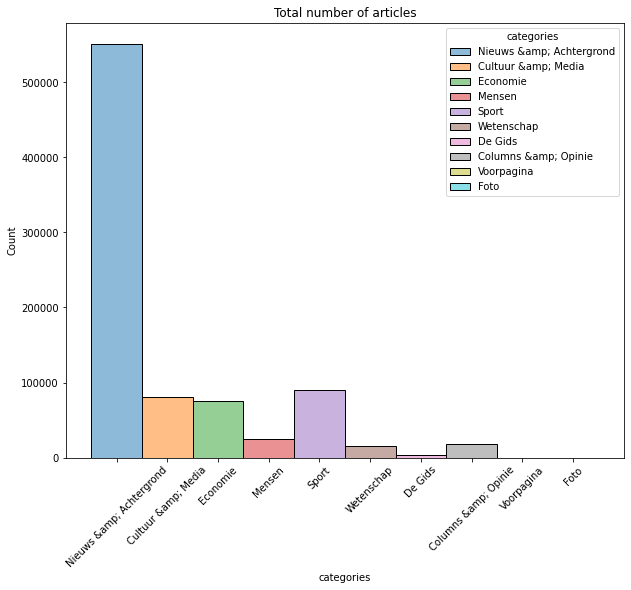

In [12]:
f, axs = plt.subplots(1,figsize=(10, 8))
sns.histplot(data=df, x="categories", hue="categories", ax=axs)
axs.tick_params(axis='x', rotation=45)
axs.set_title("Total number of articles")

In [9]:
df_year = df.copy(deep=True)
df_year["year"] = df_year.timestamp.dt.year
time_df = pd.DataFrame({'count':df_year.groupby(["year","categories"]).size()}).reset_index()
print(time_df.columns)
print(time_df.head())

Index(['year', 'categories', 'count'], dtype='object')
   year                categories  count
0  2002       Cultuur &amp; Media    481
1  2002                  Economie   1087
2  2002                    Mensen      2
3  2002  Nieuws &amp; Achtergrond  26308
4  2002                     Sport    546


Text(0.5, 1.0, 'Number of articles')

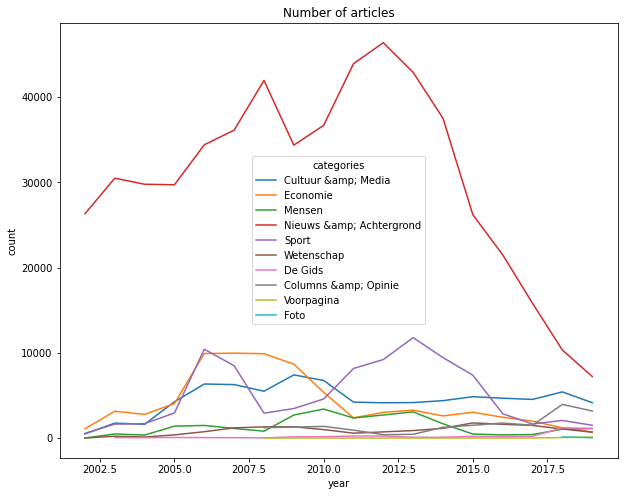

In [14]:
f, axs = plt.subplots(1,figsize=(10, 8))
sns.lineplot(data=time_df, x='year',y='count',hue='categories')
axs.set_title("Number of articles")

The counts of articles collected per year per category vary quite a bit with for example ~45.000 "News & Background" articles in 2012 and ~10.000 in 2019. These should be normalised when counting party or politician mentions for example. 